# **TASK 4: EXPLORATORY DATA ANALYSIS - GLOBAL TERRORISM**

# **The Sparks Foundation**

# **Author: Harshavardhan Subramanian Madhavan**

# **Data Science and Business Analytics Intern**

**Importing Libraries and Data Pre-processing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.offline as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
terrorism = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
print("Dataset")
terrorism.head(10)

In [ ]:
terrorism.columns

In [ ]:
terrorism.info()

In [ ]:
terrorism.describe()

In [ ]:
terrorism.isnull()

In [ ]:
terrorism.isnull().sum()

In [ ]:
terrorism.duplicated()

In [ ]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
terrorism=terrorism[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
terrorism["Country"].unique()

In [ ]:
terrorism["AttackType"].unique()

In [ ]:
terrorism["Motive"].unique()

In [ ]:
terrorism["Weapon_type"].unique()

**Destructive Features of Data**

In [ ]:
print("Country with the most attacks:",terrorism['Country'].value_counts().idxmax())
print("City with the most attacks:",terrorism['city'].value_counts().index[1]) 
print("Region with the most attacks:",terrorism['Region'].value_counts().idxmax())
print("Year with the most attacks:",terrorism['Year'].value_counts().idxmax())
print("Month with the most attacks:",terrorism['Month'].value_counts().idxmax())
print("Group with the most attacks:",terrorism['Group'].value_counts().index[1])
print("Most Attack Types:",terrorism['AttackType'].value_counts().idxmax())

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = terrorism.state.dropna(False)
plt.subplots(figsize=(10,8))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Data Visualization**

In [ ]:
plt.hist(terrorism['Country'],color="red")
plt.xlabel("Country")
plt.show()

plt.hist(terrorism['AttackType'],color="blue")
plt.xlabel("AttackType")
plt.show()

plt.hist(terrorism['Weapon_type'],color="orange")
plt.xlabel("Weapon_type")
plt.show()

plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(terrorism['AttackType'])
plt.show()

In [ ]:
terrorism['Year'].value_counts(dropna = False).sort_index()

**Number of Terrorist Attacks every year**

In [ ]:
x_year = terrorism['Year'].unique()
y_count_years = terrorism['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (14,12))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

In [ ]:
terrorism.plot(kind ="scatter", 
          x ='Weapon_type', 
          y ='AttackType') 
plt.grid()

NameError: name 'terrorism' is not defined

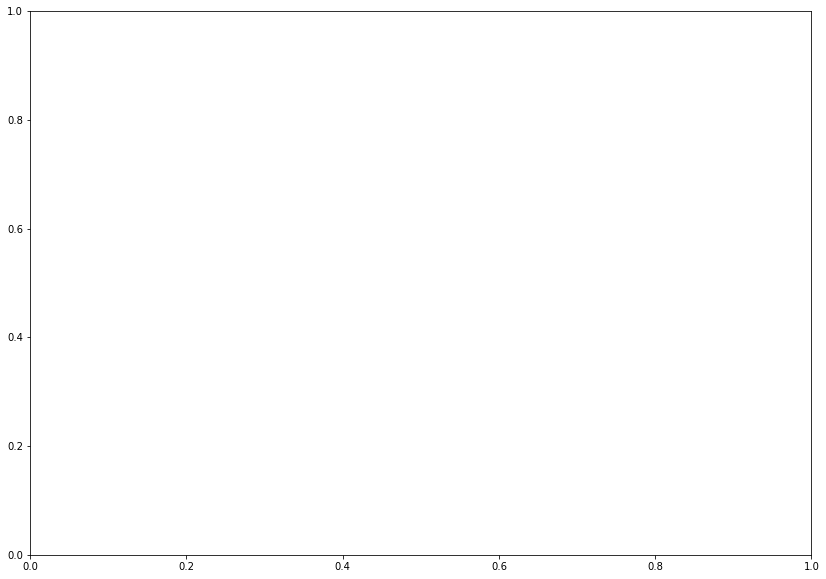

In [3]:
plt.subplots(figsize=(14,10))
sns.countplot('Year',data=terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [ ]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='area',figsize=(12,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
terrorism['Wounded'] = terrorism['Wounded'].fillna(0).astype(int)
terrorism['Killed'] = terrorism['Killed'].fillna(0).astype(int)
terrorism['casualities'] = terrorism['Killed'] + terrorism['Wounded']

In [ ]:
terror = terrorism.sort_values(by='casualities',ascending=False)[:40]

In [ ]:
heat=terror.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [ ]:
terrorism.Country.value_counts()[:15]

**Top Afffected Countries in the World**

In [ ]:
plt.subplots(figsize=(12,8))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

**Terrorist Attacks on a particular year and their Locations**

In [ ]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 2008

In [ ]:
filterData = terror[filterYear] 
reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [ ]:

terror.Group.value_counts()[1:15]

In [ ]:
terrorist = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [ ]:
terrorist.Country.unique()

In [ ]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

In [ ]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)

In [ ]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terror_df_group)):
    marker=folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                                          terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [ ]:
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

In [ ]:
attackData = terror.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

In [ ]:
labels = typeKillFormatData.columns.tolist() 
transpoze = typeKillFormatData.T 
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
plt.show()

In [ ]:
countryData = terror.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']  
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)

plt.show()

Conclusion: From the above graphs we can understand the number of terrorist attacks that happened all over the world and number of people killed in each terrorist attacks.The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries. 